LogisticRegression(C=10000)
0.9743589743589743
(512, 30)


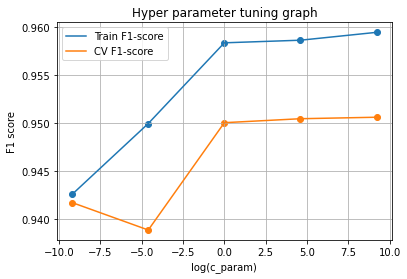

In [10]:
#code source: http://occam.olin.edu/sites/default/files/DataScienceMaterials/machine_learning_lecture_2/Machine%20Learning%20Lecture%202.html
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = load_breast_cancer() #refer: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
# in case of Random search cv tined params will be given as distrubution
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=.9)

#Using GridSearchCV
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5,return_train_score=True)
model.fit(X_train, y_train)

print(model.best_estimator_)
print(model.score(X_test, y_test))
print(X_train.shape)

res = pd.DataFrame.from_dict(model.cv_results_)
train_res = res["mean_train_score"]
cv_res = res["mean_test_score"]
c_params = np.log(list(res["param_C"]))

plt.title("Hyper parameter tuning graph")
plt.plot(c_params,train_res,label='Train F1-score')
plt.plot(c_params,cv_res,label='CV F1-score')
plt.scatter(c_params,train_res)
plt.scatter(c_params,cv_res)
plt.xlabel("log(c_param)")
plt.ylabel("F1 score")
plt.grid()
plt.legend()
plt.show()

#### In grid search or random search CV, the main parameters are type of classifier, tuning_parameters for finding best value of hyperparameter to select the model, the scoring that should be given to measure the performance metric, then cv(no.of folds) should be given , to train that many number of models and give the best model

#### In LR, the main paramters in the classifier are C value and penalty(type of regulariser - either L1 or L2)

In [ ]:
# More Sparsity (Fewer elements of W* being non-zero) by increasing Lambda (decreasing C) 

import numpy as np

clf = LogisticRegression(C=0.1, penalty='l1');
clf.fit(X_train, y_train);
w = clf.coef_
print(np.count_nonzero(w))


8


In [ ]:
clf = LogisticRegression(C=0.01, penalty='l1');
clf.fit(X_train, y_train);
w = clf.coef_
print(np.count_nonzero(w))


4


In [ ]:
clf = LogisticRegression(C=0.001, penalty='l1');
clf.fit(X_train, y_train);
w = clf.coef_
print(np.count_nonzero(w))


3


In [ ]:
clf = LogisticRegression(C=10, penalty='l1');
clf.fit(X_train, y_train);
w = clf.coef_
print(np.count_nonzero(w))

15
